# Introduction
The purpose of this analysis is to examine multiple factors and their complex interrelationships to accurately predict wage outcomes. This study strives to furnish invaluable insights into the current salary trajectories in the realm of data science, simultaneously laying a robust foundation for future explorations into the impact of key determinants like experience level, employment type and company size on the wage structures within this swiftly advancing profession.

# 1. Set Environment
- Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import warnings

- Loading the Dataset

In [2]:
df = pd.read_csv('/workspaces/DS-Salary/ds_salaries.csv')

- Showing the Dataset head

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# Display how many rows and column we have
df.shape

(3755, 11)

- Checking for duplicate

In [5]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (1171, 11)


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [7]:
#showing the parameters and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
#checking for null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
df[~df.applymap(np.isreal).all(1)]

/tmp/ipykernel_2166/358654104.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[~df.applymap(np.isreal).all(1)]


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [10]:
df.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [11]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# 2. Data Processing
Then better understanding we rename the columns

There are 4 categorical values in the column "experience_level", such as:
- EN, which is Entry-level.
- MI, which is Mid-level.
- SE, which is Senior-level.
- EX, which is Executive-level.

There are 4 categorical values in the column "employment_type", such as:
 - FT, which is Full-time.
 - PT, which is Part-time.
 - CT, which is Contractual.
 - FL, which is Freelancer.

There are 3 categorical values in the column "remote_ratio", such as:
 - 100, which is Remotely.
 - 0, which is On-site.
 - 50, which is Hybrid.

In [12]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'Remote', 0:'On-site', 50:'Hybrid'})

# Inflation Rate 

- The important thing is the inflation rate, because every year the salary will increase by the inflation rate. So we need to calculate the inflation rate for each year.
- After that we will adjust the salary based on the inflation rate.

For the inflation rate I used https://ycharts.com/indicators/us_inflation_rate this link

In [13]:
# Inflation Rate
inflation_rate_us = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
inflation_rate_global = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}

# Salary Adjustment
def salary_adjustment(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary
    adjusted_salary = original_salary
    for i in range(year, 2023):
        if currency == 'USD':
            inflation_rate = inflation_rate_us[i]
        else:
            inflation_rate = inflation_rate_global[i]

        adjusted_salary = adjusted_salary * (1 + inflation_rate)
    return adjusted_salary

#Applying the function
df['adjusted_salary'] = df.apply(salary_adjustment, axis=1)

# 3. Visualization

Top 7 jobs with average salary

In [14]:
top_salary = df.groupby('job_title').agg({'salary_in_usd':'mean'}).sort_values(by='salary_in_usd', ascending=False).head(7)
top_salary.head(7)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.000000
Cloud Data Architect,250000.000000
Data Lead,212500.000000
Data Analytics Lead,211254.500000
Principal Data Scientist,198171.125000
Director of Data Science,195140.727273
Principal Data Engineer,192500.000000


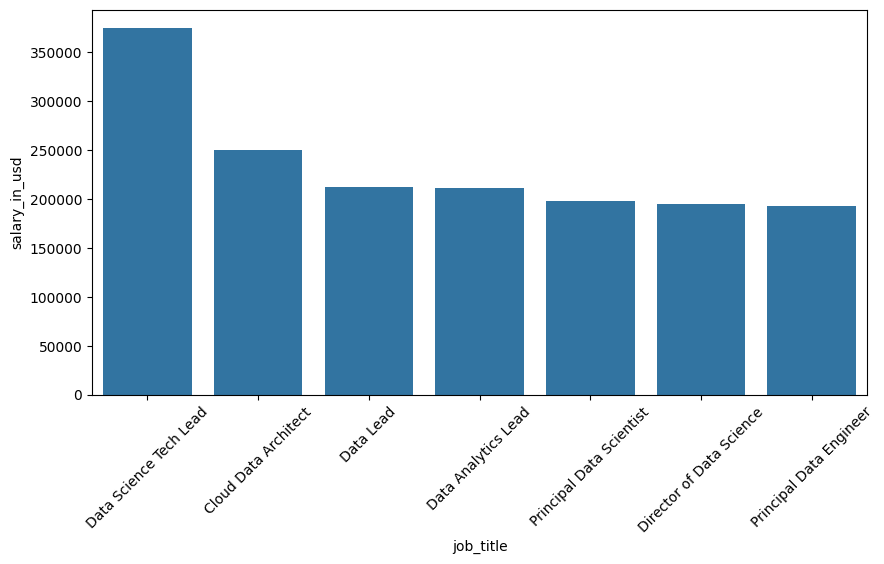

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_salary.index, y=top_salary['salary_in_usd'])
plt.xticks(rotation=45)
plt.show()

# 4. Correlation

- Dealing with Categorical and Numerical columns

In [16]:
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio', 'company_size']
numerical_columns = ['adjusted_salary']

- Creating Dummy variables

In [17]:
dummy_variable = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Preprocessing and Scaling Data

In [18]:
scaler = StandardScaler()

#Scale the numerical columns
scaled_numerical_columns = scaler.fit_transform(df[numerical_columns])

#Convert the scaled numerical columns
scaled_numerical_columns_df = pd.DataFrame(scaled_numerical_columns, columns=numerical_columns)

In [19]:
#Drop the original numerical columns
dummy_variable = dummy_variable.drop(numerical_columns, axis=1)

# Concatenate the dummy variables with the scaled numerical columns
processed_df = pd.concat([dummy_variable, scaled_numerical_columns_df], axis=1)
processed_df = processed_df.drop(['work_year', 'salary', 'salary_in_usd'], axis=1)

Correlation matrix with dummy variables

In [20]:
correlation_matrix = abs(processed_df.corr())

#Graph I.
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

corr = abs(processed_df.corr())
target_corr = corr['adjusted_salary'].drop('adjusted_salary')

#Sort correlation values
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II.
# Creating a heatmap of the correlation values with the target column
sns.set(font_scale=0.8)
sns.set_style('white')
sns.set_palette('PuBuGn_d')
sns.heatmap(target_corr_sorted.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Salary')
plt.show()

ValueError: could not convert string to float: 'Principal Data Scientist'

# 5. Data Preparation

- Removing outliers with IQR

In [21]:
data = df.copy()
data = data.drop(['work_year','salary','salary_currency','salary_in_usd','salary_in_usd','job_title'], axis=1)
Q1 = data.quantile(0.25)
Q2 = data.quantile(0.75)
IQR = Q2 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q2 + 1.5 * IQR))).any(axis=1)]
data.shape

TypeError: unsupported operand type(s) for -: 'str' and 'str'

- Categorize salary to seven ranges

In [22]:
# Calculate quantiles for salary bin edges
quantiles = [0, 1/7, 2/7, 3/7, 4/7, 5/7, 6/7, 1]
bin_edges = [data['adjusted_salary'].quantile(q) for q in quantiles]

# Convert the continuous salary variable into 7 discrete bins based on quantiles
salary_labels = ['low', 'low-mid', 'mid', 'mid-high', 'high', 'very-high', 'Top']
data['salary_range'] = pd.cut(data['adjusted_salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

- Preprocessing

In [23]:
# Label encoding for categorical features
encoder = LabelEncoder()
categorical_features = ['employment_type', 'experience_level', 
                        'employee_residence', 'remote_ratio', 'company_location', 'company_size']
for feature in categorical_features:
    data[f'{feature}']=data[f'{feature}'].astype('string')
    data[feature] = encoder.fit_transform(data[feature])
# Split the dataset into training and testing sets
X = data.drop(["adjusted_salary", "salary_range"], axis=1)
y = data["salary_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#now i will use standard scaler to fit it to the training data

scaler = StandardScaler()
scaler.fit(X_train)

#now transforming the training and the validation data

scaler.transform(X_train) 
scaler.transform(X_test)

array([[ 0.58590286,  0.03038287, -2.90261091,  1.03972997, -2.90746492,
         0.21463987],
       [ 0.58590286,  0.03038287,  0.45378446,  1.03972997,  0.44441807,
         0.21463987],
       [ 0.58590286,  0.03038287,  0.45378446,  1.03972997,  0.44441807,
         0.21463987],
       ...,
       [-2.73704025,  0.03038287,  0.45378446,  1.03972997,  0.44441807,
         0.21463987],
       [ 0.58590286,  0.03038287, -2.11595575, -0.67545335, -2.1561808 ,
         0.21463987],
       [ 0.58590286,  0.03038287, -2.11595575, -0.67545335, -2.1561808 ,
         0.21463987]])

- Training and Validation

In [25]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# Logistic Regression

In [26]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
lgr_acc = accuracy_score(y_test, y_pred)
print(f"{lgr} - Accuracy: {lgr_acc:.2f}")

LogisticRegression(max_iter=1000) - Accuracy: 0.24


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print(f"{rf} - Accuracy: {rf_acc:.2f}")

RandomForestClassifier() - Accuracy: 0.26


# Gradient Boosting

In [28]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
gb_acc = accuracy_score(y_test, y_pred)
print(f"{gb} - Accuracy: {gb_acc:.2f}")

GradientBoostingClassifier() - Accuracy: 0.28


# KNNS

In [29]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)  
print(f"KNN - Accuracy: {knn_acc:.2f}")

KNN - Accuracy: 0.23


# Logistic Regression with PCA

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [31]:
lr = LogisticRegression(solver="lbfgs")
lr.fit(X_train, y_train)
lr_acc = float(lr.score(X_test, y_test))
print(f"PCA(LR) - Accuracy: {lr_acc:.2f}")

PCA(LR) - Accuracy: 0.21


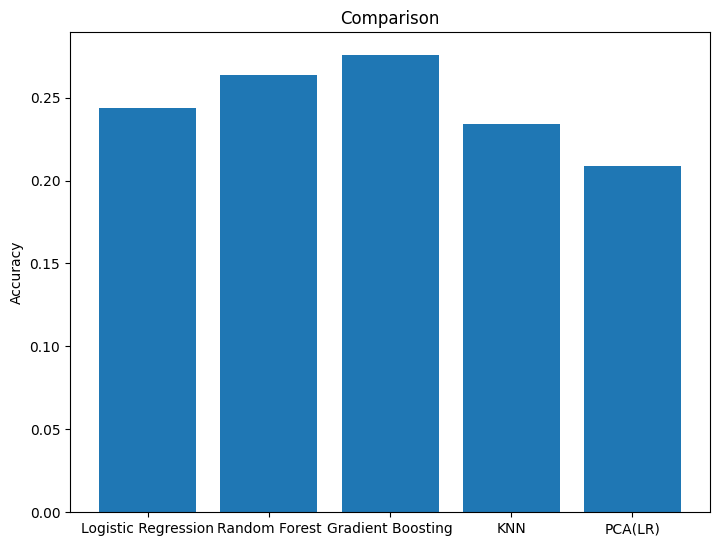

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algos = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'KNN', 'PCA(LR)']
Accuracy = [lgr_acc, rf_acc, gb_acc, knn_acc, lr_acc]
acc = ax.bar(algos,Accuracy)

plt.ylabel('Accuracy')
plt.title('Comparison')
plt.show()